### Step 1 Install and import all necessary libraries in your Jupyter notebook.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [62]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

### Step 2 Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).
Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.

Also recall that the difference between your variables’ scales can’t be too large or your results will be biased.

Make sure you standardize your data first.

In [4]:
df = pd.read_csv(r'C:\Users\PC\Documents\zomato.csv', index_col = False)

Spotting Missing values

In [10]:
null_values=df.isnull().sum()

In [12]:
print(null_values[null_values > 0])

rate                            7775
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
dtype: int64


In [14]:
df.dropna(inplace = True)

In [16]:
df.shape

(23193, 17)

Looking for duplicates

In [19]:
df_dups = df[df.duplicated()]

In [21]:
df_dups

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


Renaming Columns

In [26]:
df.rename(columns = {'listed_in(type)' : 'theme'}, inplace = True)

In [28]:
df.rename(columns = {'listed_in(city)' : 'city'}, inplace = True)

In [30]:
df.rename(columns = {'approx_cost(for two people)' : 'cost'}, inplace = True)

In [32]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'theme', 'city'],
      dtype='object')

Changing Data Type

In [35]:
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

In [37]:
df['cost'] = df['cost'].astype(str)

In [39]:
df['cost'] = df['cost'].str.replace(r",", "", regex=True)
df['cost'] = df['cost'].str.extract(r"(\d+)", expand=False)

In [41]:
# Convert to numeric type (float o int)
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

In [43]:
# Verify the cleaning
print(df[['cost']].info())
print(df['cost'].head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 23193 entries, 0 to 51715
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cost    23193 non-null  int64
dtypes: int64(1)
memory usage: 362.4 KB
None
0     800
1     800
2     800
3     300
4     600
5     600
7     600
8     700
9     550
10    500
Name: cost, dtype: int64


In [45]:
df['rate'] = df['rate'].astype(str).str.strip()

In [47]:
df['rate'] = df['rate'].str.replace(" ", "", regex=False)

In [49]:
print(df['rate'].value_counts(dropna=False))

rate
3.9/5    3238
4.0/5    2860
4.1/5    2786
3.8/5    2473
4.2/5    2097
4.3/5    1671
3.7/5    1639
4.4/5    1123
3.6/5     875
4.5/5     630
3.5/5     482
3.4/5     351
2.8/5     315
2.9/5     309
3.1/5     307
4.6/5     294
3.0/5     291
3.2/5     249
3.3/5     218
2.7/5     190
4.7/5     167
NEW       147
2.6/5     138
4.8/5      66
2.5/5      57
4.9/5      55
2.4/5      54
2.3/5      45
2.2/5      26
2.1/5      24
2.0/5      11
1.8/5       5
Name: count, dtype: int64


In [51]:
df['rate'] = df['rate'].replace("NEW", np.nan)

In [53]:
print(df['rate'].isnull().sum())

147


In [55]:
print(df['rate'].value_counts(dropna=False))

rate
3.9/5    3238
4.0/5    2860
4.1/5    2786
3.8/5    2473
4.2/5    2097
4.3/5    1671
3.7/5    1639
4.4/5    1123
3.6/5     875
4.5/5     630
3.5/5     482
3.4/5     351
2.8/5     315
2.9/5     309
3.1/5     307
4.6/5     294
3.0/5     291
3.2/5     249
3.3/5     218
2.7/5     190
4.7/5     167
NaN       147
2.6/5     138
4.8/5      66
2.5/5      57
4.9/5      55
2.4/5      54
2.3/5      45
2.2/5      26
2.1/5      24
2.0/5      11
1.8/5       5
Name: count, dtype: int64


In [57]:
df['rate'] = df['rate'].str.replace("/5", "", regex=False)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

print(df['rate'].dtype)
print(df['rate'].head())

float64
0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23193 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           23193 non-null  object 
 1   address       23193 non-null  object 
 2   name          23193 non-null  object 
 3   online_order  23193 non-null  object 
 4   book_table    23193 non-null  object 
 5   rate          23046 non-null  float64
 6   votes         23193 non-null  int64  
 7   phone         23193 non-null  object 
 8   location      23193 non-null  object 
 9   rest_type     23193 non-null  object 
 10  dish_liked    23193 non-null  object 
 11  cuisines      23193 non-null  object 
 12  cost          23193 non-null  int64  
 13  reviews_list  23193 non-null  object 
 14  menu_item     23193 non-null  object 
 15  theme         23193 non-null  object 
 16  city          23193 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 3.2+ MB


Remove or Convert Non-Numeric Columns: Drop unnecessary columns

In [69]:
df_cleaned = df.select_dtypes(include=['float64', 'int64'])

In [77]:
print(df_cleaned.isna().sum())

rate     147
votes      0
cost       0
dtype: int64


In [79]:
df_cleaned = df_cleaned.dropna()

### Step 3 Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [81]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [83]:
score = [kmeans[i].fit(df_cleaned).score(df_cleaned) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-35040188562.63151,
 -17233262886.759712,
 -11447594213.426268,
 -7725364257.552252,
 -5996669442.968746,
 -5039994293.52426,
 -4209392976.1076064,
 -3213540613.3556256,
 -2797619387.153501]

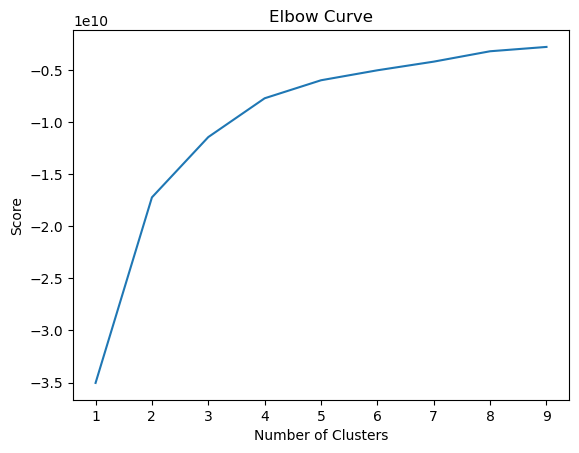

In [85]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Step 4 Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart. 
Explain why you chose that number in a markdown cell.

### In this plot, there's a considerable jump from three to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

### Step 5 Run the k-means algorithm

In [93]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [97]:
# Fit the k-means object to the data.

kmeans.fit(df_cleaned)

KMeans(n_clusters=4)

### Step 6 Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [102]:
df_cleaned = df_cleaned.copy()

# Now perform clustering safely
df_cleaned['clusters'] = kmeans.fit_predict(df_cleaned)

In [104]:
df_cleaned.head()

,rate,votes,cost,clusters
0,4.1,775,800,0
1,4.1,787,800,0
2,3.8,918,800,0
3,3.7,88,300,0
4,3.8,166,600,0


In [106]:
df_cleaned['clusters'].value_counts()

clusters
0    16877
2     4037
3     1929
1      203
Name: count, dtype: int64

### Step 7 Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters

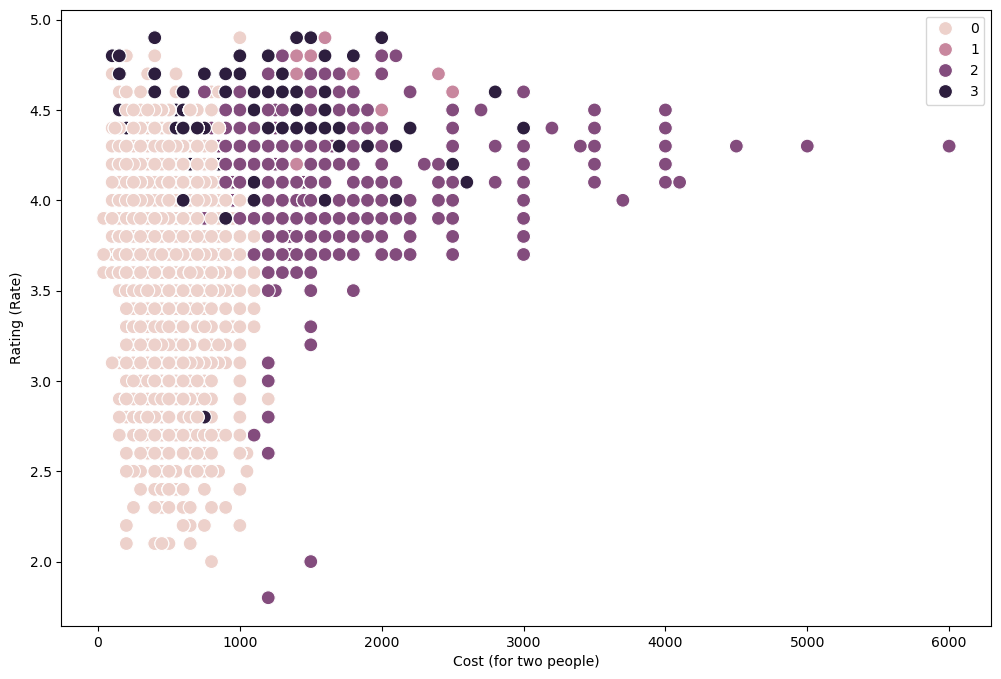

In [113]:
# Plot the clusters for the "cost" and "rates" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned['cost'], y=df_cleaned['rate'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cost (for two people)') # Label x-axis.
plt.ylabel('Rating (Rate)') # Label y-axis.
plt.show()

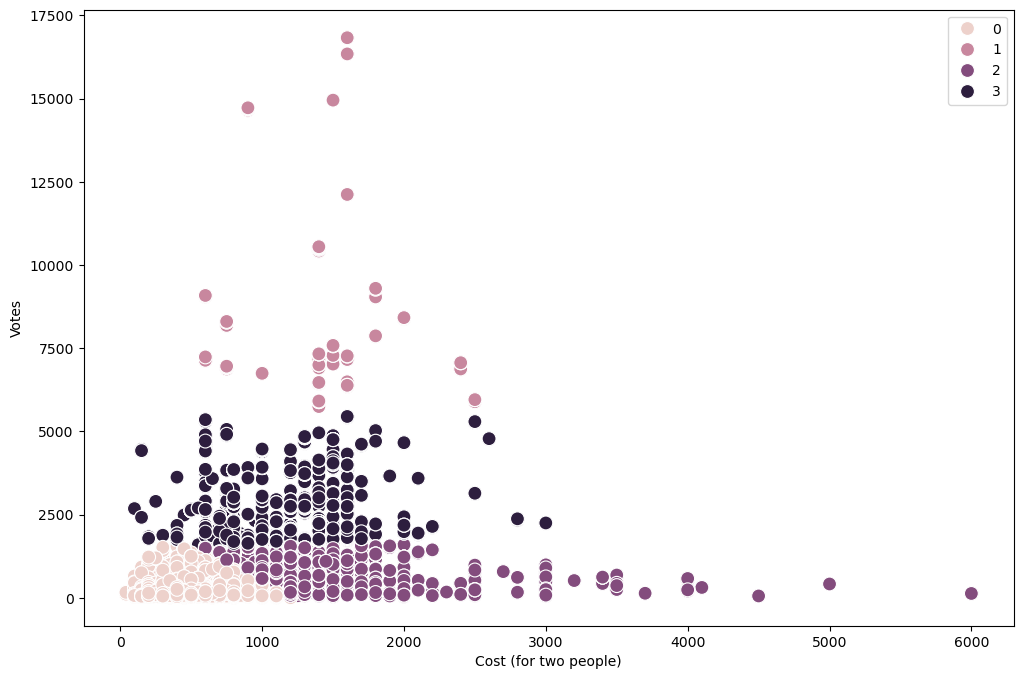

In [115]:
# Plot the clusters for the "cost" and "votes" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned['cost'], y=df_cleaned['votes'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cost (for two people)') # Label x-axis.
plt.ylabel('Votes') # Label y-axis.
plt.show()

### Step 8 Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further. 

Note down your thoughts in a markdown cell.

### (Rating vs Cost):

General Pattern: The graph shows a clear trend where restaurants with low or moderate costs have a wide range of ratings, from low to high.

Clusters:

Cluster 0 (cream color) is mainly concentrated in low-cost restaurants with varying ratings.

Cluster 1 (purple tone) tends to be in the mid-range for both cost and ratings.

Clusters 2 and 3 (darker tones) represent higher-cost restaurants with consistently high ratings, which is typical for luxury dining experiences where higher prices are expected to ensure quality.

Conclusion: The relationship between cost and rating is not linear. Many affordable restaurants receive good ratings, but higher-priced ones are more likely to have consistently high ratings.

### (Votes vs Cost):

General Pattern: The plot shows a scattered distribution, with many low-cost restaurants receiving a high number of votes.

Clusters:

Cluster 0 (cream color) focuses on low-cost restaurants with a moderate number of votes.

Cluster 1 includes places with more votes and intermediate prices.

Clusters 2 and 3 (darker tones) cover more expensive restaurants with a wider spread of votes, suggesting that high-end restaurants receive fewer but more selective votes.

Conclusion: The most popular restaurants (with the highest number of votes) tend to be more affordable. Expensive places receive fewer votes, which is common for exclusive or fine-dining establishments.

### Step 9 Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [123]:
df_cleaned.loc[df_cleaned['clusters'] == 3, 'cluster'] = 'black'
df_cleaned.loc[df_cleaned['clusters'] == 2, 'cluster'] = 'dark purple'
df_cleaned.loc[df_cleaned['clusters'] == 1, 'cluster'] = 'purple'
df_cleaned.loc[df_cleaned['clusters'] == 0, 'cluster'] = 'cream'

In [125]:
df_cleaned.groupby('cluster').agg({'cost':['mean', 'median'], 
                         'rate':['mean', 'median'], 
                         'votes':['mean', 'median']})

cost              rate               votes        
                    mean  median      mean median         mean  median
cluster                                                               
black        1166.951788  1200.0  4.313893    4.3  2732.713323  2420.0
cream         521.164306   500.0  3.796445    3.9   248.826332   164.0
dark purple  1503.294526  1400.0  4.128511    4.1   676.812485   606.0
purple       1320.443350  1400.0  4.529557    4.5  8559.517241  7544.0

### Step 10 Propose what these results could be useful for in future steps of an analytics pipeline.

#### The clustering results reveal distinct customer segments based on cost, ratings, and votes:

Cream Cluster (Low Cost, Low Votes, Moderate Rating): This group represents budget-friendly restaurants popular among casual diners. Marketing efforts could focus on increasing visibility, promotions, or loyalty programs.

Dark Purple Cluster (High Cost, Good Rating, Moderate Votes): These are premium restaurants appreciated by a niche audience. A targeted marketing strategy could include exclusive dining experiences or partnerships.

Purple Cluster (High Cost, Excellent Rating, Very High Votes): This segment shows luxury, highly-rated, and popular establishments. Efforts could focus on influencer partnerships, upscale advertising, and premium services.

Black Cluster (Moderate Cost, High Rating, Moderate Votes): These are good value-for-money options. Promotions could focus on quality and reliability, emphasizing positive reviews.

### Understanding customer preferences allows businesses to design menus tailored to each segment:

The Purple Cluster can offer gourmet and seasonal dishes.

The Cream Cluster may benefit from affordable, popular items.

Experiment with menu changes and track performance per cluster.